In [ ]:
pip install opencv-python

In [ ]:
import cv2
import matplotlib.pyplot as plt
import io
import os
from PIL import Image
import numpy as np
from matplotlib.colors import ListedColormap

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving 00891_00_mask.png to 00891_00_mask.png
Saving 03615_00_mask.png to 03615_00_mask.png
Saving 07445_00_mask.png to 07445_00_mask.png
Saving 07573_00_mask.png to 07573_00_mask.png
Saving 08909_00_mask.png to 08909_00_mask.png
Saving 10549_00_mask.png to 10549_00_mask.png


In [ ]:
image_filenames = ['00891_00_mask.png', '03615_00_mask.png', '07445_00_mask.png', '07573_00_mask.png', '08909_00_mask.png', '10549_00_mask.png']

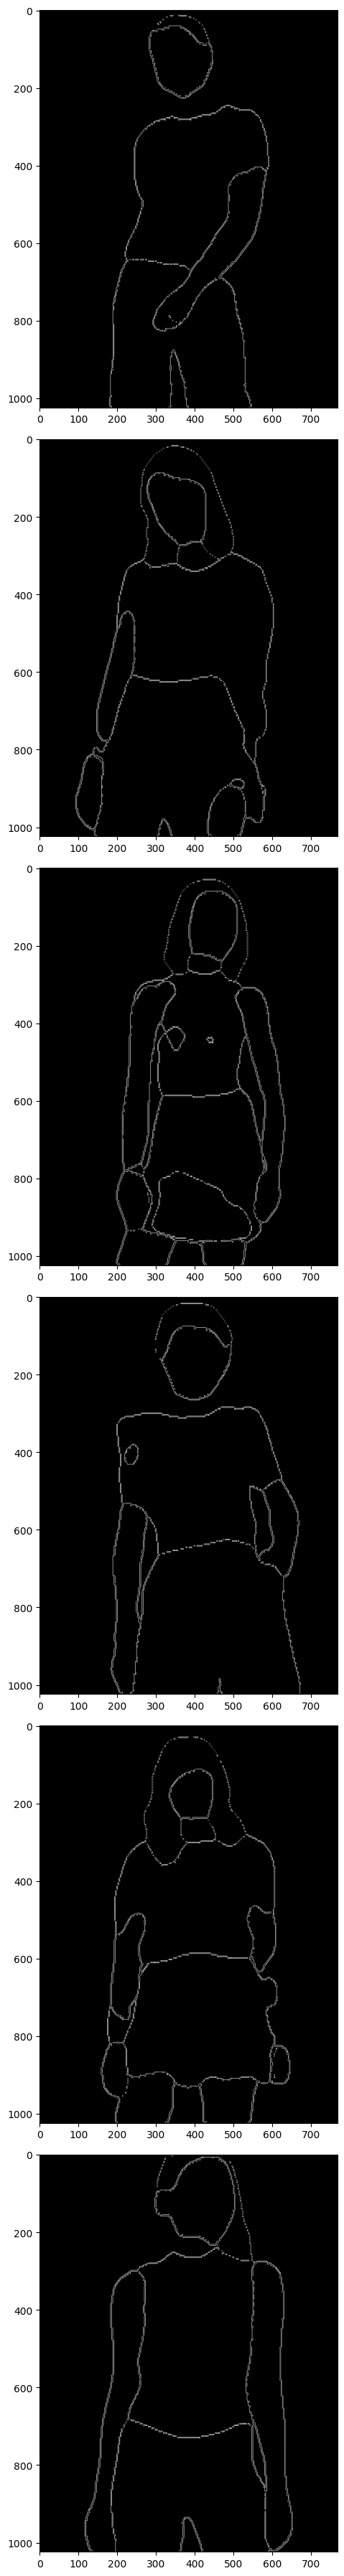

In [ ]:
num_rows = len(image_filenames)
fig, axs = plt.subplots(num_rows, 1, figsize=(6, 6*num_rows))

for i, (ax, image_filename) in enumerate(zip(axs, image_filenames)):

    uploaded_image = Image.open(io.BytesIO(uploaded[image_filename])).convert("L")
    image = cv2.cvtColor(np.array(uploaded_image), cv2.COLOR_RGB2BGR)


    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)


    thresholded = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


    edges = cv2.Canny(thresholded, threshold1=30, threshold2=70)

    ax.imshow(edges, cmap='gray')


plt.tight_layout()
plt.show()


Unique values for image 1: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
(1024, 768)
(1024, 768)
Unique values for image 2: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
(1024, 768)
(1024, 768)
Unique values for image 3: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
(1024, 768)
(1024, 768)
Unique values for image 4: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
(1024, 768)
(1024, 768)
Unique values for image 5: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
(1024, 768)
(1024, 768)
Unique values for image 6: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
(1024, 768)
(1024, 768)


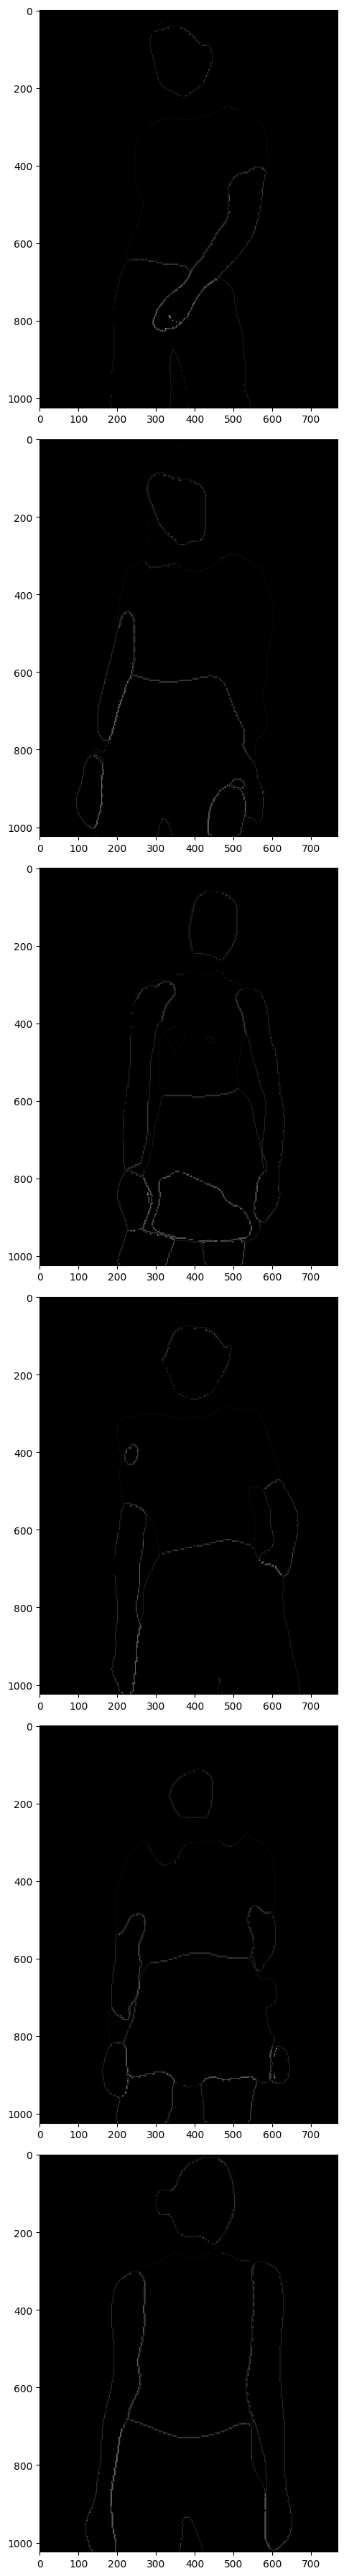

In [ ]:
num_rows = len(image_filenames)
fig, axs = plt.subplots(num_rows, 1, figsize=(6, 6*num_rows))

for i, (ax, image_filename) in enumerate(zip(axs, image_filenames)):
    uploaded_image = Image.open(io.BytesIO(uploaded[image_filename])).convert("L")
    image = cv2.cvtColor(np.array(uploaded_image), cv2.COLOR_RGB2BGR)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)

    thresholded = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    edges = cv2.Canny(thresholded, threshold1=30, threshold2=70)

    edge_image = np.zeros_like(image, dtype=np.uint8)
    edge_image[edges > 0] = 255

    # gray[gray > 0] = 255

    masked_image = np.logical_and(gray, edge_image[:,:,0]).astype(np.uint8)
    masked_image = (masked_image * (255.0 / masked_image.max())).astype(np.uint8)

    for row in range(masked_image.shape[0]):
        for col in range(masked_image.shape[1]):
            if masked_image[row, col] == 255:
                masked_image[row, col] = gray[row, col]

    print("Unique values for image {}: {}".format(i+1, np.unique(masked_image)))
    print(masked_image.shape)
    print(gray.shape)

    ax.imshow(masked_image, cmap='gray')

plt.tight_layout()
plt.show()


Unique values for image 1: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
(1024, 768)
(1024, 768)
Unique values for image 2: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
(1024, 768)
(1024, 768)
Unique values for image 3: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
(1024, 768)
(1024, 768)
Unique values for image 4: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
(1024, 768)
(1024, 768)
Unique values for image 5: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
(1024, 768)
(1024, 768)
Unique values for image 6: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
(1024, 768)
(1024, 768)


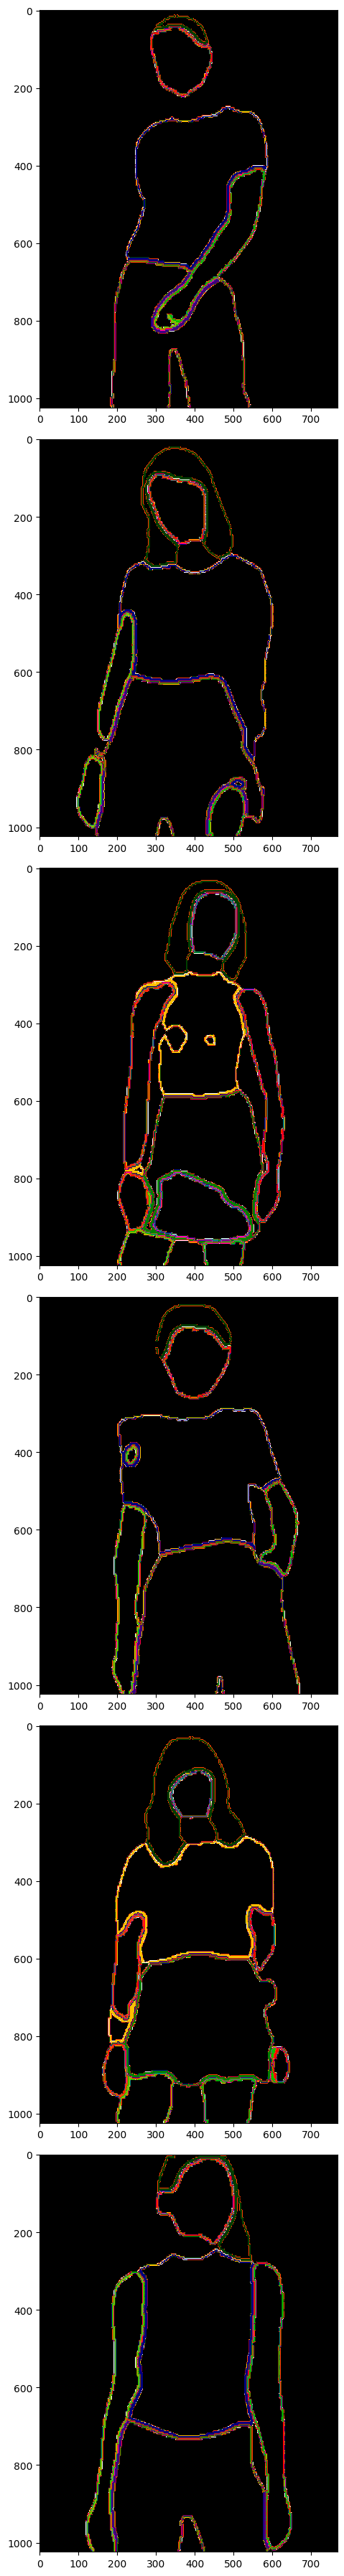

In [ ]:
colormap = [
    (0, 0, 0),
    (1, 0.25, 0), (0, 0.25, 0), (0.5, 0, 0.25), (1, 1, 1),
    (1, 0.75, 0), (0, 0, 0.5), (0.5, 0.25, 0), (0.75, 0, 0.25),
    (1, 0, 0.25), (0, 0.5, 0), (0.5, 0.5, 0), (0.25, 0, 0.5),
    (1, 0, 0.75), (0, 0.5, 0.5), (0.25, 0.5, 0.5), (1, 0, 0),
    (1, 0.25, 0), (0, 0.75, 0), (0.5, 0.75, 0)
]

color_map= ListedColormap(colormap)

num_rows = len(image_filenames)
fig, axs = plt.subplots(num_rows, 1, figsize=(6, 6*num_rows))

for i, (ax, image_filename) in enumerate(zip(axs, image_filenames)):
    uploaded_image = Image.open(io.BytesIO(uploaded[image_filename])).convert("L")
    image = cv2.cvtColor(np.array(uploaded_image), cv2.COLOR_RGB2BGR)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)

    thresholded = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    edges = cv2.Canny(thresholded, threshold1=30, threshold2=70)

    kernel = np.ones((10, 10), np.uint8)
    edges_dilated = cv2.dilate(edges, kernel, iterations=1)

    edge_image = np.zeros_like(image, dtype=np.uint8)
    edge_image[edges_dilated > 0] = 255


    masked_image = np.logical_and(gray, edge_image[:,:,0]).astype(np.uint8)
    masked_image = (masked_image * (255.0 / masked_image.max())).astype(np.uint8)

    for row in range(masked_image.shape[0]):
        for col in range(masked_image.shape[1]):
            if masked_image[row, col] == 255:
                masked_image[row, col] = gray[row, col]

    print("Unique values for image {}: {}".format(i+1, np.unique(masked_image)))
    print(masked_image.shape)
    print(gray.shape)

    ax.imshow(masked_image, cmap=color_map)

plt.tight_layout()
plt.show()
